In [1]:
import h5py
import numpy as np
import scipy.io as sio
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
Label: [ 1.]


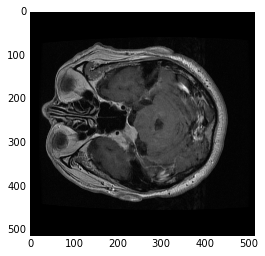

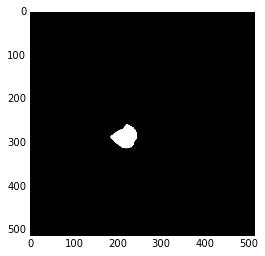

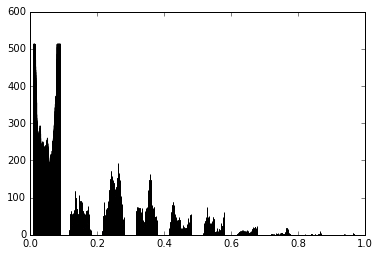

In [15]:
# Test how to read in the .mat file and parse whatever data is inside
with h5py.File('brainTumorDataPublic_1766/6.mat', 'r') as f:
    # Get an idea of what's inside the h5py FileObject
    print(list(f['cjdata'].keys()))
    label = np.array(f['cjdata/label'])
    dset = f['cjdata/image']
    mask = f['cjdata/tumorMask']
    # Normalize the data within dset to between 0.0 and 1.0
    dset_arr = np.array(dset)
    dset_arr = dset_arr.reshape((dset_arr.shape[0] * dset_arr.shape[1], 1))
    dset_norm = np.array(dset) * (1 / np.max(dset_arr))
    # Results
    print("Label: {}".format(label[0]))
    plt.imshow(dset, cmap='gray')
    plt.figure(2)
    plt.imshow(mask, cmap='gray')
    plt.figure(3)
    plt.hist(dset_norm)

In [13]:
# Take a look at what's inside the cvind.mat file
with h5py.File('cvind.mat', 'r') as f:
    print(list(f.keys()))
    # cvind.mat describes what kind of shot was taken for the dataset
    cvind = f['cvind']
    print(cvind.shape)
    print(cvind.dtype)
    print(cvind[0, :10])

['cvind']
(1, 3064)
float64
[ 5.  5.  5.  5.  5.  3.  3.  3.  4.  4.]


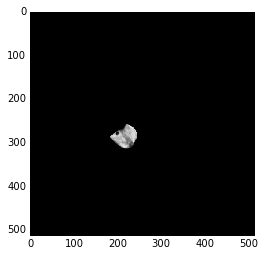

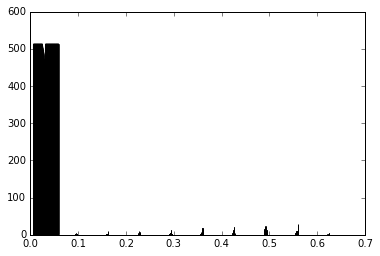

In [24]:
# Test the mask on top of the brain tumor itself and display the segmented tumor
with h5py.File('brainTumorDataPublic_1766/6.mat', 'r') as f:
    # Get an idea of what's inside the h5py FileObject
    label = np.array(f['cjdata/label'])
    dset = f['cjdata/image']
    mask = f['cjdata/tumorMask']
    # Normalize the data within dset to between 0.0 and 1.0
    dset = np.array(dset)
    mask = np.array(mask)
    dset_flat = dset_arr.reshape((dset_arr.shape[0] * dset_arr.shape[1], 1))
    dset = np.array(dset) * (1 / np.max(dset_arr))
    # Results
    seg_img = np.multiply(dset, mask)
    plt.imshow(seg_img, cmap='gray')
    plt.figure(2)
    plt.hist(seg_img)

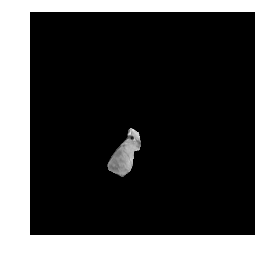

In [31]:
# Save masked image to png file and label to a text file
with h5py.File('brainTumorDataPublic_1766/1.mat', 'r') as f:
    file = open('train_labels.txt', 'w')
    img = f['cjdata/image']
    mask = f['cjdata/tumorMask']
    label = f['cjdata/label']
    img = np.array(img)
    mask = np.array(mask)
    # Normalize to 0.0 to 1.0
    img = img * (1 / np.max(np.max(img)))
    seg_img = np.multiply(img, mask)
    file.write(str(int(label[0])) + '\n')
    file.close()
    plt.axis('off')
    plt.imshow(seg_img, cmap='gray')
    plt.savefig('1.png', transparent=True, frameon=True, bbox_inches='tight')